In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

# Install ipympl and uncomment this for interactive plots 
# %matplotlib widget
import minisom
from umap import UMAP

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold, neighbors
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score
from sklearn.metrics import classification_report

random_state = 42

In [2]:
   
def plot_clusters(data, labels):
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=y) # colors,) # **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)



In [3]:
df = pd.read_csv('14cancer.xtrain', delim_whitespace=True, names=[f'sample {i}' for i in range(1, 145)])
dftest = pd.read_csv('14cancer.xtest', delim_whitespace=True, names=[f'sample {i}' for i in range(1, 55)])
df = df.T.reset_index().drop(columns='index').copy()
dftest = dftest.T.reset_index().drop(columns='index').copy()

labels = [int(x) for x in open('14cancer.ytrain').readline().split()]
df_labels = pd.DataFrame({'label': labels})
labelstest = [int(x) for x in open('14cancer.ytest').readline().split()]
df_labels_test = pd.DataFrame({'label': labelstest})

label_names = {
    1: 'breast',
    2:  'prostate',
    3:  'lung',
    4:  'collerectal',
    5:  'lymphoma',
    6:  'bladder',
    7:  'melanoma',
    8:  'uterus',
    9: 'leukemia',
    10: 'renal',
    11: 'pancreas',
    12: 'ovary',
    13: 'meso',
    14: 'cns'
}

In [4]:
def plot_2d(X, labels, title):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.jet)
    plt.xlabel('coefficient 1')
    plt.ylabel('coefficient 2')
    plt.title(title)

In [ ]:
n_features = len(label_names)
train = np.array(df)
test = np.array(dftest)
som_shape = (IMPLEMENT_ME, IMPLEMENT_ME)
SIGMA = IMPLEMENT_ME
LR = IMPLEMENT_ME
som = minisom.MiniSom(som_shape[0], som_shape[1], n_features, sigma=SIGMA, learning_rate=LR,)

# this can make results more stable, but it also takes a long time to process
# som.pca_weights_init(data)

som.train(IMPLEMENT_ME, IMPLEMENT_ME)

In [ ]:
# Plot a 3d projection of the som weights
# (the map is som_shape[0] X som_shape[1] and each point on the map has an associated weight)

IMPLEMENT_ME

In [ ]:
def classify(som, x, y):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(x, y)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in x:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result


pred = classify(som, test, df_labels_test.label)


print(adjusted_mutual_info_score(df_labels_test.label, pred))
print(classification_report(df_labels_test.label, pred))

In [9]:

# Plot the distance_map from the som to get the U-Matrix (NxN).  Choose a suitable cmap when plotting.
# IMPLEMENT_ME


# different colors and markers for each label
markers = ['o', 's', 'D', '.', ',', '<', '>', '^', '1', '2', '3', '4', 's', 'p', 'P', '*']
colors = ['blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 
          'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', ]


# Plot the winner (som.winner(x)) for every datapoint x on its node on the U-Matrix plot above.  Choose a different colour for each class.
# this should look something like the seeds_clusters.png plot
# IMPLEMENT_ME

### LLE

In [10]:
#Preprocess data using sklearn
from sklearn import preprocessing

# Normalize the data
X= train.copy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

0.20185964321004665


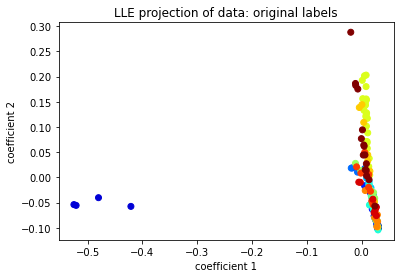

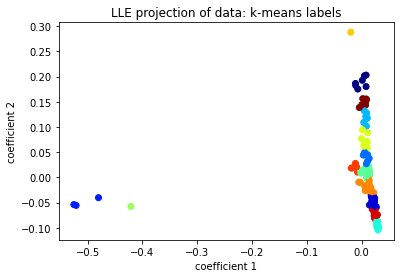

In [11]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_features, method='modified', eigen_solver='dense', random_state=random_state)
LLE_PROJECTION = lle.fit_transform(X_scaled)

plot_2d(LLE_PROJECTION, df_labels.label, 'LLE projection of data: original labels')

km = KMeans(init='k-means++', n_clusters=14)

km.fit(LLE_PROJECTION)

plot_2d(LLE_PROJECTION, km.labels_, 'LLE projection of data: k-means labels')

print(adjusted_mutual_info_score(df_labels.label, km.labels_))


Here we can see the genes are grouped together. It is clear to see the clusters they are in. 
In the middle, the points are more tighty clustered, this is expected as LLE looks for points that are a similar in small local areas.

### UMAP

0.4796762343743216


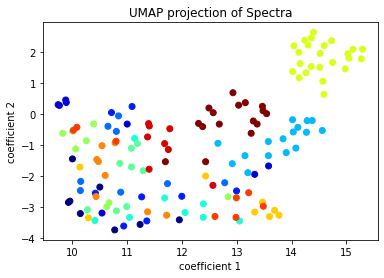

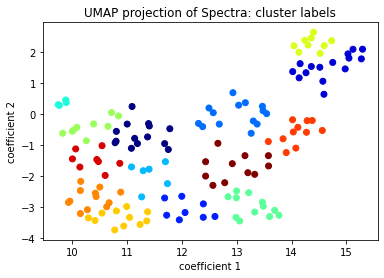

In [12]:
umap_obj = UMAP(
    n_components= 2,
    metric = "euclidean",
    n_neighbors=n_features, 
    min_dist= 0.2,
    random_state=random_state)

UMAP_PROJECTION = umap_obj.fit_transform(X_scaled)

plot_2d(UMAP_PROJECTION, df_labels.label, 'UMAP projection of Spectra')

km = KMeans(init='k-means++', n_clusters=14)
km.fit(UMAP_PROJECTION)

plot_2d(UMAP_PROJECTION, km.labels_, 'UMAP projection of Spectra: cluster labels')

print(adjusted_mutual_info_score(df_labels.label, km.labels_))



The UMAP was able to ge the clusters, better than the LLE. 